In [1]:
import pandas as pd

## Importiamo il DataSet

In [3]:
ds = pd.read_csv(r'C:\Users\Claud\OneDrive\Desktop\project-a\MASTER CLASS MACHINE LEARNING\Regressione lineare\data\ecomm_data.csv')
ds.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Vediamo una descrizione del nostro DataSet

In [5]:
ds.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Tramite grafico vediamo quali sono le colonne che hanno una correlazione con la colonna 'Yearly Amount Spent'

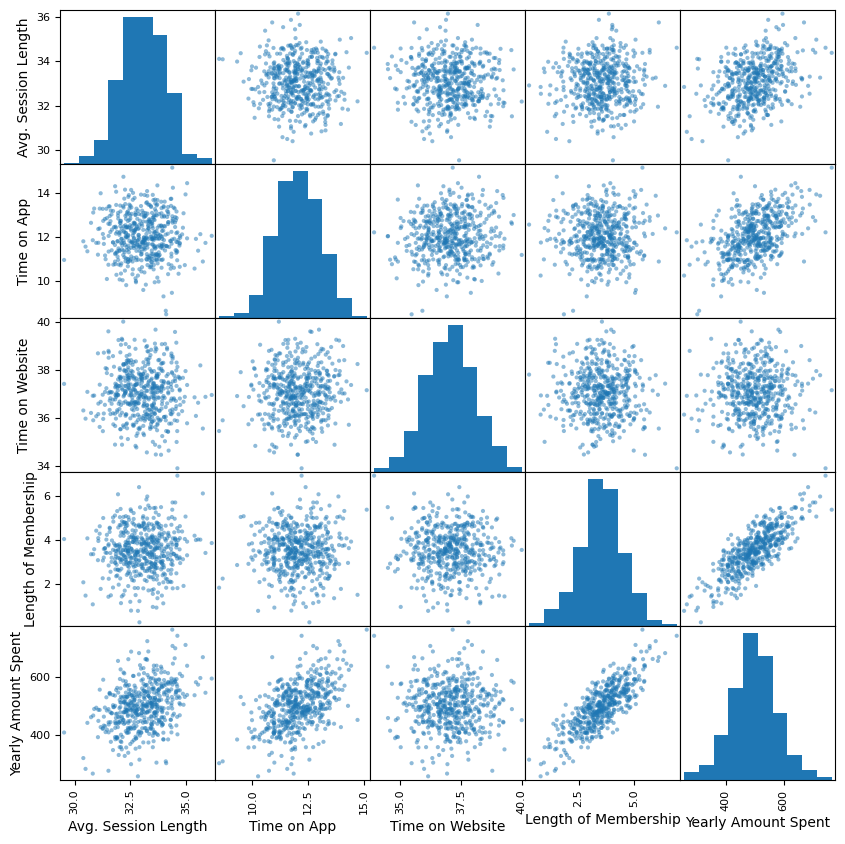

In [9]:
correlazioni = pd.plotting.scatter_matrix(ds, figsize=(10,10))

## Come vediamo e' presente una correlazione con le colonne 'Time on App' & 'Length of Membership' e impostiamo queste due colonne come valore di X, e la colonna 'Yearly Amount Spent' come Y

In [12]:
x = ds[['Time on App', 'Length of Membership']]
y = ds['Yearly Amount Spent']

## Creiamo le nostre X_train, X_test, Y_train, Y_test utilizzando train_test_splint della libreria sklearn e utilizzando il 20% del nostro dataset come file di test

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print('Esempi di addestramento:', len(x_train))
print('Esempi di test:', len(x_test))

Esempi di addestramento: 400
Esempi di test: 100


## Addestriamo il nostro modello tramite LinearRegression di sklearn e calcolaimo:
*  Coefficenti angolari (che indicano la gradazione di inclinazione della retta della nostra previsione)
*  L'intercetta (offset dell'origine) indica il valore di Y nel caso in qui X sia 0 in origine

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print("Coefficenti angolari:", model.coef_) 
print("Offset dell'origine:", model.intercept_)

Coefficenti angolari: [38.05229762 62.74587847]
Offset dell'origine: -180.71299120812358


## Come possiamo vedere dai seguenti due grafici i dati delle colonne 'Time on App' & 'Length of Membership' addestrati con il modello danno buone predizioni data la loro correlazione 

<function matplotlib.pyplot.show(close=None, block=None)>

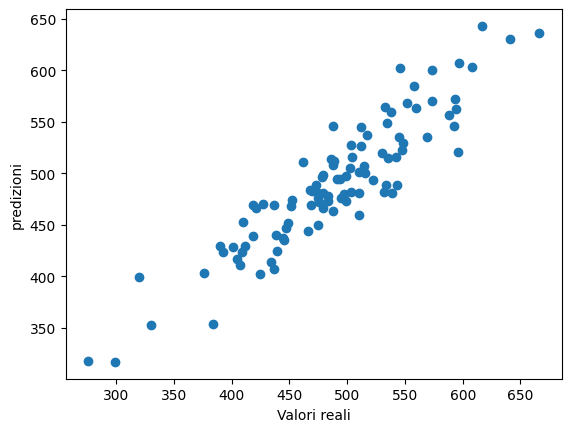

In [24]:
from matplotlib import pyplot as plt 

risultato = model.predict(x_test)
plt.scatter(y_test, risultato)
plt.xlabel("Valori reali")
plt.ylabel("predizioni")
plt.show


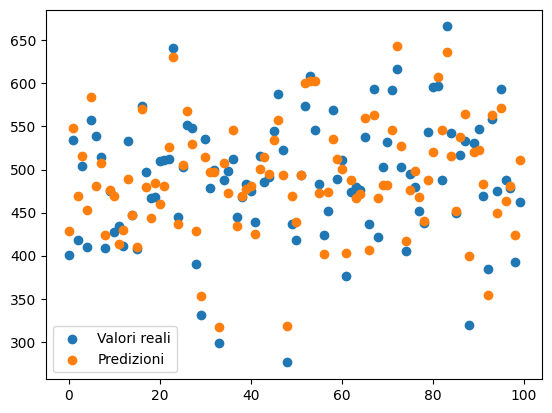

In [25]:
plt.scatter(range(len(x_test)), y_test, label = 'Valori reali')
plt.scatter(range(len(x_test)), risultato, label = 'Predizioni')
plt.legend()
plt.show()

## Adesso tramite la libreria sklearn calcoliamo i seguenti errori:
*  mean_absolute_error (MAE = (1/n) * Σ(y - y_pred)
*  max_error
*  explained_variance_score (la varianza dei residui indica la distanza fra i punti rispetto alla retta di regressione)             Varianza dei residui = (1 / (n - 2)) * Σ(y - y_pred)^2

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, max_error
print('Errore Medio Assoluto:', mean_absolute_error(y_test, risultato))   
print('Errore Massimo:', max_error(y_test, risultato))
print('Varianza', explained_variance_score (y_test, risultato)) 

Errore Medio Assoluto: 23.020740305230383
Errore Massimo: 79.239618674719
Varianza 0.8383645320846995


## Addestriamo il modello e calcoliamo gli errori ma con le colonne 'Time on Website', 'Avg. Session Length

In [31]:
x = ds[['Time on Website', 'Avg. Session Length']]
y = ds['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

model.fit(x_train, y_train)

risultato = model.predict(x_test)

print('Errore Medio Assoluto:', mean_absolute_error(y_test, risultato)) 
print('Errore Massimo:', max_error(y_test, risultato))
print('Varianza', explained_variance_score (y_test, risultato))

Errore Medio Assoluto: 54.041350267169086
Errore Massimo: 200.62398366263494
Varianza 0.15203343888684806


## Come possiamo vedere dai 2 grafici seguenti l'addestramento del modello non da risultati ottimali poiche' nel primo grafico i punti non seguono alcuna trasversale e nel secondo c'e' poca sovrapposizione fra i valori di test e i valori addestrati dal modello 

<function matplotlib.pyplot.show(close=None, block=None)>

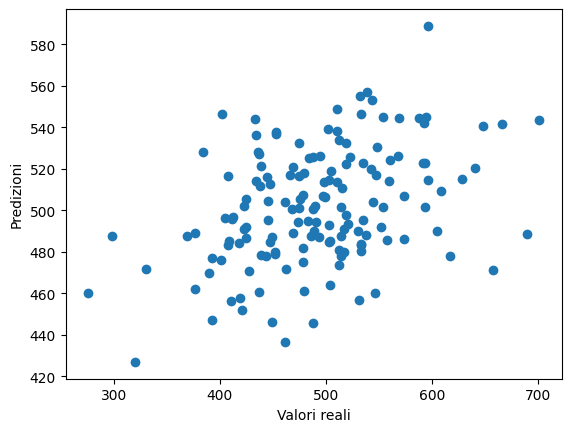

In [33]:
results = model.predict(x_test)
plt.scatter(y_test, risultato)
plt.xlabel("Valori reali")
plt.ylabel("Predizioni")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

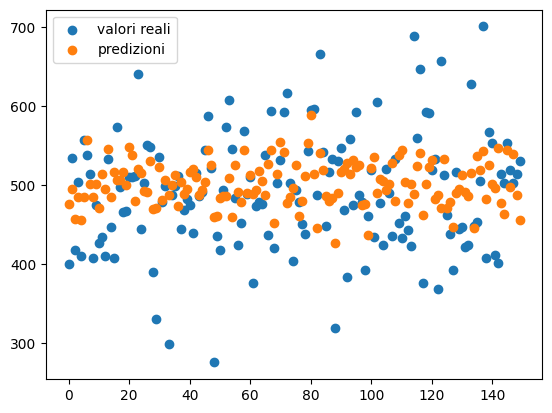

In [34]:
plt.scatter(range(len(x_test)), y_test, label='valori reali')
plt.scatter(range(len(x_test)), risultato, label= 'predizioni')
plt.legend()
plt.show

## Addestriamo il modello e calcoliamo gli errori con tutte e 4 le colonne precedenti (che erano le colonne che mostravano una maggiore correlazione con la 'Yearly Amount Spent'

In [39]:
x = ds[['Time on App', 'Length of Membership', 'Time on Website', 'Avg. Session Length', ]]
y = ds['Yearly Amount Spent']

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size= 0.3, random_state=42)

model.fit(x_train, y_train)

risultato = model.predict(x_test)

print('Errore assoluto medio', mean_absolute_error(y_test, risultato))
print('Errore Massimo', max_error(y_test, risultato))
print('Varianza', explained_variance_score(y_test, risultato))

Errore assoluto medio 8.426091641432095
Errore Massimo 30.812190004543083
Varianza 0.9812611651910702


## Come possiamo vedere dai grafici e dai risultati del calcolo degli errori, addestrando il modello con tutte e 4 le colonne con la maggiore correlazione ha dato dei risultati ottimali, Le previsoni della colonna 'Yearly Amount Spent' sono tutte sovrapposte o quasi ai valori veri di addestramento 

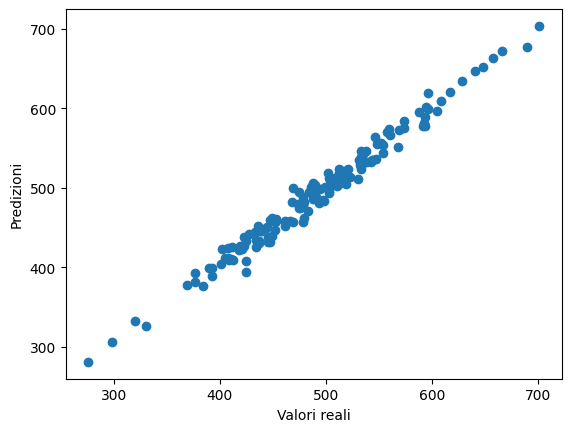

In [43]:
results = model.predict(x_test)
plt.scatter(y_test, risultato)
plt.xlabel("Valori reali")
plt.ylabel("Predizioni")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

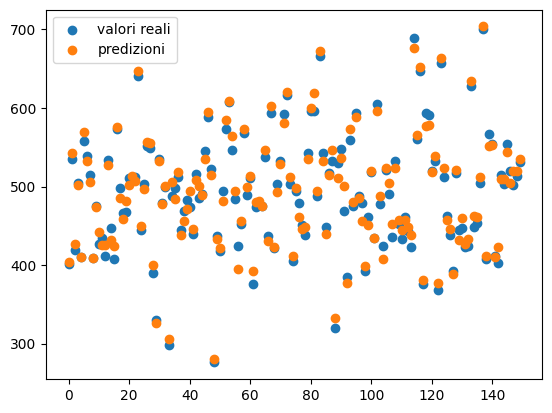

In [42]:
plt.scatter(range(len(x_test)), y_test, label = 'valori reali')
plt.scatter(range(len(x_test)), risultato, label = 'predizioni')
plt.legend()
plt.show